In [1]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()


Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [0]:

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  


In [0]:
# add noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

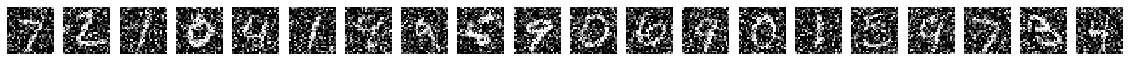

In [13]:
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [62]:
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
input_img = Input(shape=(28, 28, 1)) 

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_7 (UpSampling2 (None, 14, 14, 32)        0         
__________

In [65]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.1195 - val_loss: 0.1113
Epoch 2/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.1124 - val_loss: 0.1078
Epoch 3/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.1086 - val_loss: 0.1061
Epoch 4/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.1062 - val_loss: 0.1066
Epoch 5/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.1048 - val_loss: 0.1035
Epoch 6/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.1034 - val_loss: 0.1016
Epoch 7/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.1024 - val_loss: 0.1005
Epoch 8/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.1018 - val_loss: 0.1012
Epoch 9/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.1010 - val_loss: 0.0

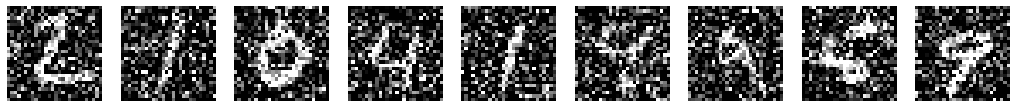

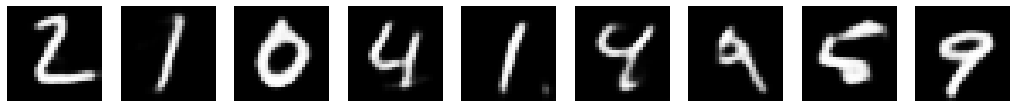

In [66]:
denoised_data=autoencoder.predict_on_batch(x_test_noisy)
# print(denoised_data.shape)


n = 10
plt.figure(figsize=(20, 200))
for i in range(1,n):
    a1 = plt.subplot(1,n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    a1.get_xaxis().set_visible(False)
    a1.get_yaxis().set_visible(False)
plt.show()    

plt.figure(figsize=(20, 200))
for i in range(1,n):
    a1 = plt.subplot(1,n, i)
    plt.imshow(denoised_data[i].reshape(28, 28))
    a1.get_xaxis().set_visible(False)
    a1.get_yaxis().set_visible(False)   
plt.show()    
